<a href="https://colab.research.google.com/github/edernatanzz/Faculdade/blob/main/Cavalo_vaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar o Tensorflow

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar as bibliotecas

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

Lendo os dados da pasta no Drive

In [ ]:
dataset_dir = os.path.join(os.getcwd(), '/content/drive/MyDrive/dados')

dataset_train_dir = os.path.join(dataset_dir, 'treinar')
dataset_train_cavalo_len = len(os.listdir(os.path.join(dataset_train_dir, 'cavalo')))
dataset_train_vaca_len = len(os.listdir(os.path.join(dataset_train_dir, 'vaca')))

dataset_validation_dir = os.path.join(dataset_dir, 'validar')
dataset_validation_cavalo_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cavalo')))
dataset_validation_vaca_len = len(os.listdir(os.path.join(dataset_validation_dir, 'vaca')))

print('Treinar Cavalos: %s' % dataset_train_cavalo_len)
print('Treinar Vacas: %s' % dataset_train_vaca_len)
print('Validar Cavalos: %s' % dataset_validation_cavalo_len)
print('Validar Vacas: %s' % dataset_validation_vaca_len)

Treinar Cavalos: 1000
Treinar Vacas: 1000
Validar Cavalos: 500
Validar Vacas: 500


Pre-processamento das imagens

In [ ]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['Cavalo', 'Vaca']

In [ ]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


In [ ]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


In [ ]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


Plotar imagens do dataset

In [ ]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])


<Figure size 432x288 with 0 Axes>

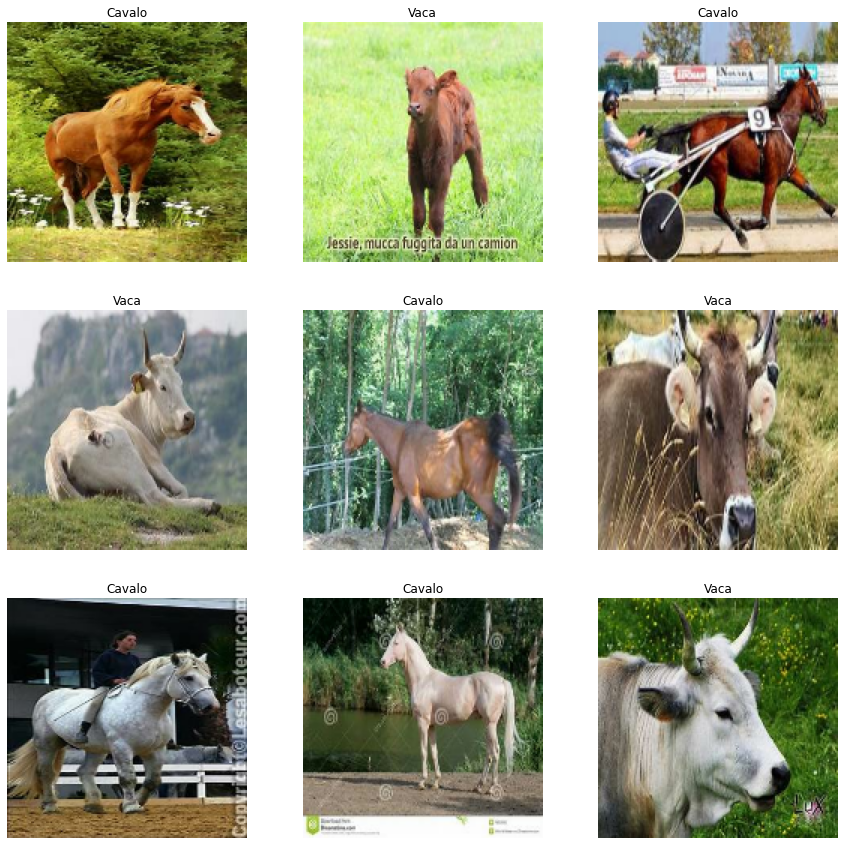

In [ ]:
plot_dataset(dataset_train)

<Figure size 432x288 with 0 Axes>

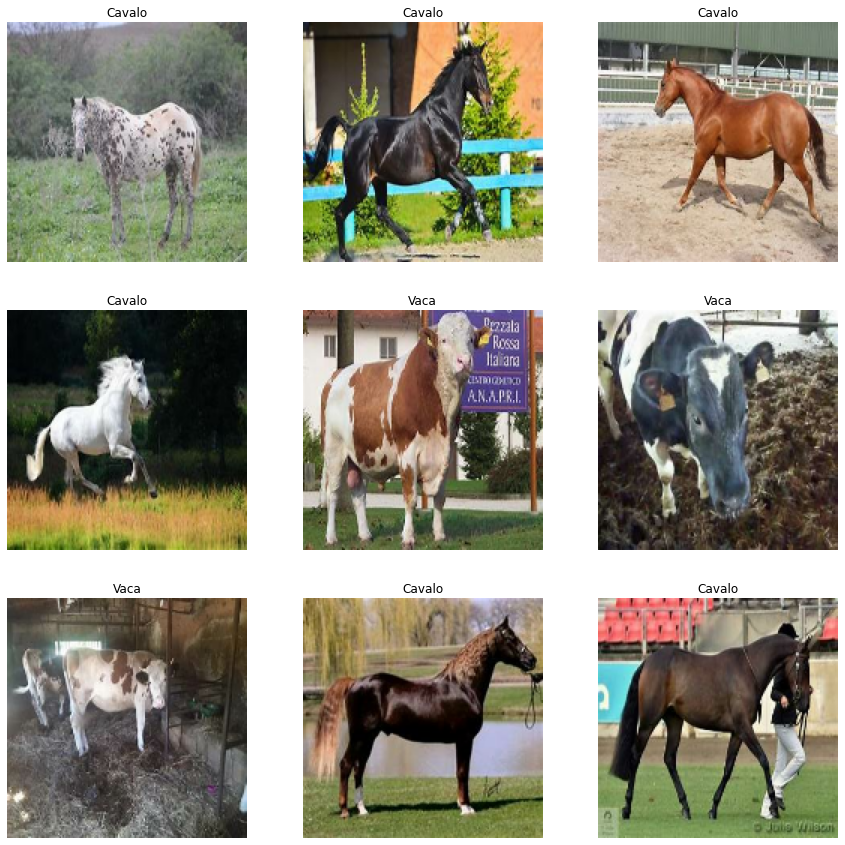

In [ ]:
plot_dataset(dataset_validation)


Criando o model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    tf.keras.layers.Conv2D(32, 3, padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2)
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 40, 40, 64)       

Treinamento

In [ ]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
)

Epoch 1/20
63/63 [==============================] - 65s 1s/step - loss: 0.2664 - accuracy: 0.8975 - val_loss: 0.5254 - val_accuracy: 0.7475
Epoch 2/20
63/63 [==============================] - 61s 968ms/step - loss: 0.2394 - accuracy: 0.9160 - val_loss: 0.5772 - val_accuracy: 0.7228
Epoch 3/20
63/63 [==============================] - 64s 1s/step - loss: 0.2301 - accuracy: 0.9180 - val_loss: 0.5390 - val_accuracy: 0.7611
Epoch 4/20
63/63 [==============================] - 72s 1s/step - loss: 0.2190 - accuracy: 0.9250 - val_loss: 0.5634 - val_accuracy: 0.7401
Epoch 5/20
63/63 [==============================] - 65s 1s/step - loss: 0.2017 - accuracy: 0.9320 - val_loss: 0.5744 - val_accuracy: 0.7488
Epoch 6/20
63/63 [==============================] - 66s 1s/step - loss: 0.1944 - accuracy: 0.9320 - val_loss: 0.5972 - val_accuracy: 0.7401
Epoch 7/20
63/63 [==============================] - 62s 974ms/step - loss: 0.1852 - accuracy: 0.9385 - val_loss: 0.6088 - val_accuracy: 0.7463
Epoch 8/20
63/

Grafico de precisão 

In [ ]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()


<Figure size 432x288 with 0 Axes>

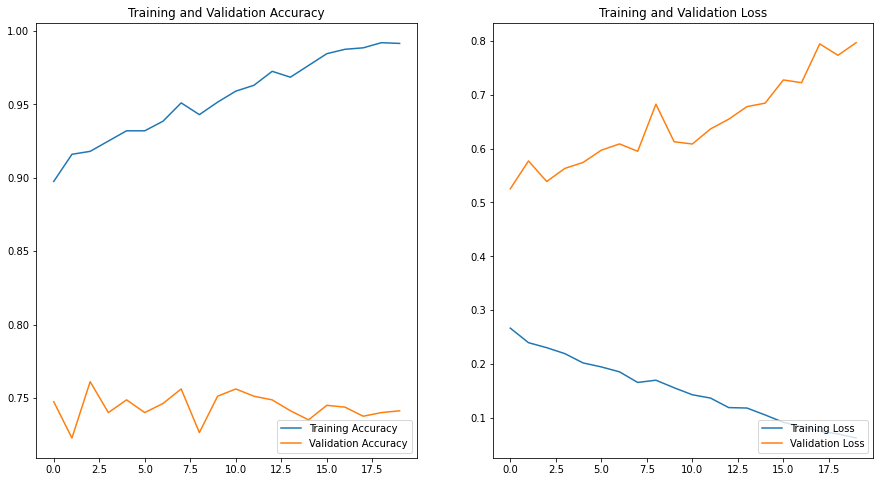

In [ ]:
plot_model()

Verificar se é Cavalo ou Vaca

In [ ]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0]
Predictions: [1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

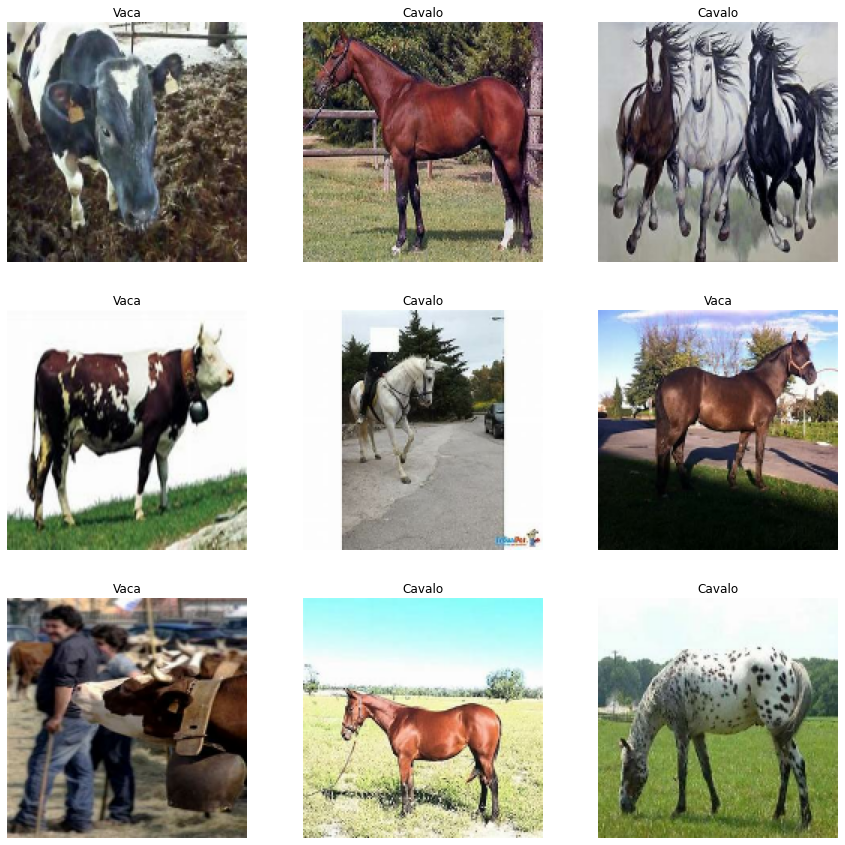

In [ ]:
plot_dataset_predictions(dataset_test)

Salvar

In [ ]:
model.save('/content/drive/MyDrive/dados/model2')

Carregar

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/dados/model')

Carregar modelo 2 

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/dados/model2')